In [1]:
# scrollable plots
%matplotlib notebook

# # simple plots
# %matplotlib inline

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import importlib

try:
    importlib.reload(mtools)
    print("reloading mixing_tools")
except NameError:
    import mixing_tools as mtools
    print("importing mixing_tools")

reloading mixing_tools


## Testing unit functions

In [24]:
# create samples for testing out import functions

def create_sample_int16():
    x = np.arange(1,10+1, dtype=np.int16)
    x.tofile('test-int16.bin')
create_sample_int16()

def create_sample_float64():
    x = np.arange(11,20+1, dtype=np.float64)
    x.tofile('test-float64.bin')
create_sample_float64()

In [16]:
# testing out frequency <-> FFT index functions

# sample 1: basic operation with even sized FFTs
fs = 32
ts = 1/fs
n = 16
f1 = np.fft.fftfreq(n, d=ts)
print("ind, f1:", *[(x,f) for x,f in enumerate(f1)], sep='\n')

print("fpos {}: floor index {}, {}".format(7.0, *mtools.fpos2indFloor(7.0, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(7.0, *mtools.fpos2indCeil(7.0, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(8.1, *mtools.fpos2indFloor(8.1, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(8.1, *mtools.fpos2indCeil(8.1, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(-7.0, *mtools.fneg2indFloor(-7.0, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(-7.0, *mtools.fneg2indCeil(-7.0, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(-8.0, *mtools.fneg2indFloor(-8.0, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(-8.0, *mtools.fneg2indCeil(-8.0, n, ts, fout=True)))
print()

# sample 2: test out working with FFTs with odd number of elements
fs = 27
ts = 1/fs
n = 15
f1 = np.fft.fftfreq(n, d=ts)
print("ind, f1:", *[(x,f) for x,f in enumerate(f1)], sep='\n')

print("fpos {}: floor index {}, {}".format(7.0, *mtools.fpos2indFloor(7.0, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(7.0, *mtools.fpos2indCeil(7.0, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(8.1, *mtools.fpos2indFloor(8.1, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(8.1, *mtools.fpos2indCeil(8.1, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(-7.0, *mtools.fneg2indFloor(-7.0, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(-7.0, *mtools.fneg2indCeil(-7.0, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(-8.0, *mtools.fneg2indFloor(-8.0, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(-8.0, *mtools.fneg2indCeil(-8.0, n, ts, fout=True)))
print()

# sample 3: test out center frequency offset
fs = 32
ts = 1/fs
n = 16
fc = 31
f1 = np.fft.fftfreq(n, d=ts)
f1[0:8] = f1[0:8] + fc
f1[8:] = f1[8:] - fc
print("ind, f1:", *[(x,f) for x,f in enumerate(f1)], sep='\n')

print("fpos {}: floor index {}, {}".format(7.0, *mtools.fpos2indFloor(7.0 + fc, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(7.0, *mtools.fpos2indCeil(7.0 + fc, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(8.1, *mtools.fpos2indFloor(8.1 + fc, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(8.1, *mtools.fpos2indCeil(8.1 + fc, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(-7.0, *mtools.fneg2indFloor(-7.0 -fc, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(-7.0, *mtools.fneg2indCeil(-7.0 - fc, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(-8.0, *mtools.fneg2indFloor(-8.0 - fc, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(-8.0, *mtools.fneg2indCeil(-8.0 - fc, n, ts, fout=True)))

ind, f1:
(0, 0.0)
(1, 2.0)
(2, 4.0)
(3, 6.0)
(4, 8.0)
(5, 10.0)
(6, 12.0)
(7, 14.0)
(8, -16.0)
(9, -14.0)
(10, -12.0)
(11, -10.0)
(12, -8.0)
(13, -6.0)
(14, -4.0)
(15, -2.0)
fpos 7.0: floor index 3, 6.0
fpos 7.0: ceil index 4, 8.0
fpos 8.1: floor index 4, 8.0
fpos 8.1: ceil index 5, 10.0
fpos -7.0: floor index 12, -8.0
fpos -7.0: ceil index 13, -6.0
fpos -8.0: floor index 12, -8.0
fpos -8.0: ceil index 12, -8.0

ind, f1:
(0, 0.0)
(1, 1.7999999999999998)
(2, 3.5999999999999996)
(3, 5.3999999999999995)
(4, 7.199999999999999)
(5, 9.0)
(6, 10.799999999999999)
(7, 12.599999999999998)
(8, -12.599999999999998)
(9, -10.799999999999999)
(10, -9.0)
(11, -7.199999999999999)
(12, -5.3999999999999995)
(13, -3.5999999999999996)
(14, -1.7999999999999998)
fpos 7.0: floor index 3, 5.4
fpos 7.0: ceil index 4, 7.2
fpos 8.1: floor index 4, 7.2
fpos 8.1: ceil index 5, 9.0
fpos -7.0: floor index 11, -7.2
fpos -7.0: ceil index 12, -5.4
fpos -8.0: floor index 10, -9.0
fpos -8.0: ceil index 11, -7.2

ind, f1:


In [15]:
# sample 1: basic operation with even sized FFTs
fs = 32
ts = 1/fs
n = 16
f1 = np.fft.fftfreq(n, d=ts)
print("ind, f1:", *[(x,f) for x,f in enumerate(f1)], sep='\n')
fftShifted = mtools.fft_basebandShift(f1, 2, 5)
print("size:", fftShifted.size)
print(fftShifted)
print()

# sample 2: off sized series
fs = 27
ts = 1/fs
n = 15
f1 = np.fft.fftfreq(n, d=ts)
print("ind, f1:", *[(x,f) for x,f in enumerate(f1)], sep='\n')
fftShifted = mtools.fft_basebandShift(f1, 0, 2)
print("size:", fftShifted.size)
print(fftShifted)
print()

ind, f1:
(0, 0.0)
(1, 2.0)
(2, 4.0)
(3, 6.0)
(4, 8.0)
(5, 10.0)
(6, 12.0)
(7, 14.0)
(8, -16.0)
(9, -14.0)
(10, -12.0)
(11, -10.0)
(12, -8.0)
(13, -6.0)
(14, -4.0)
(15, -2.0)
size: 6
[  4.   6.   8. -10.  -8.  -6.]

ind, f1:
(0, 0.0)
(1, 1.7999999999999998)
(2, 3.5999999999999996)
(3, 5.3999999999999995)
(4, 7.199999999999999)
(5, 9.0)
(6, 10.799999999999999)
(7, 12.599999999999998)
(8, -12.599999999999998)
(9, -10.799999999999999)
(10, -9.0)
(11, -7.199999999999999)
(12, -5.3999999999999995)
(13, -3.5999999999999996)
(14, -1.7999999999999998)
size: 4
[ 0.   1.8 -3.6 -1.8]



size: 66
freq of 0th bin: 10.49901768172888
new sampling time: 0.24100378787878787


<IPython.core.display.Javascript object>


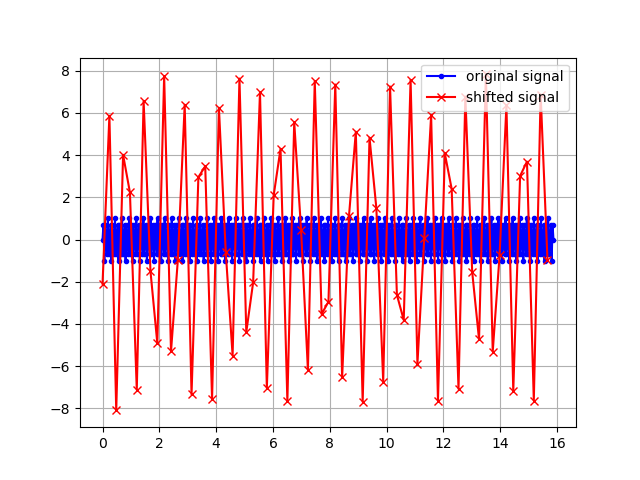

<IPython.core.display.Javascript object>


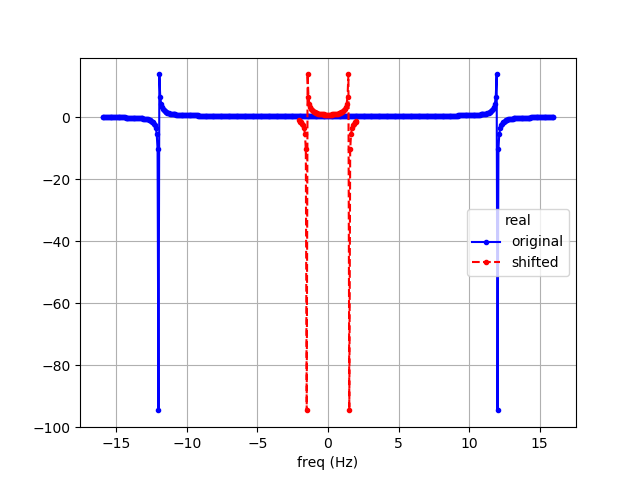

<IPython.core.display.Javascript object>


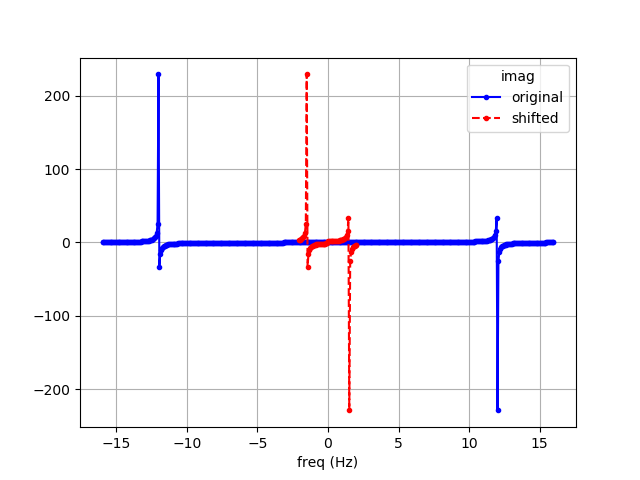

In [25]:
# sample case: create a signal with off-center sine wave. pull it down to baseband and check if the frequencies still make sense
fs = 32
ts = 1/fs
n = 509
t = np.arange(n)*ts # time series

# construct signal: simple sine wave
fSig = 12
w = 2*np.pi*fSig
x = np.sin(w*t)

xShifted, f0, TsShifted = mtools.basebandShift(x, ts, bwSignal=2, fcSignal=10.5, fcData=0)

nShifted = xShifted.size
tShifted = np.arange(nShifted)*TsShifted

print("size:", nShifted)
print("freq of 0th bin:", f0)
print("new sampling time:", TsShifted)

# plot time domain
plt.figure()
plt.plot(t, x, 'b.-', label="original signal")
plt.plot(tShifted, xShifted, 'r-x', label="shifted signal")
plt.legend()
plt.grid()


# plot frequency domain
xf = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(n, ts))
xfShifted = np.fft.fftshift(np.fft.fft(xShifted))
fShifted = np.fft.fftshift(np.fft.fftfreq(nShifted, TsShifted))

plt.figure()
plt.plot(f, xf.real, 'b.-', label="original")
plt.plot(fShifted, xfShifted.real, 'r.--', label="shifted")
plt.legend(title="real")
plt.grid()
plt.xlabel("freq (Hz)")

plt.figure()
plt.plot(f, xf.imag, 'b.-', label="original")
plt.plot(fShifted, xfShifted.imag, 'r.--', label="shifted")
plt.legend(title="imag")
plt.grid()
plt.xlabel("freq (Hz)")


plt.show()

template size: 12


/home/adwait/anaconda3/envs/deep-learning/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


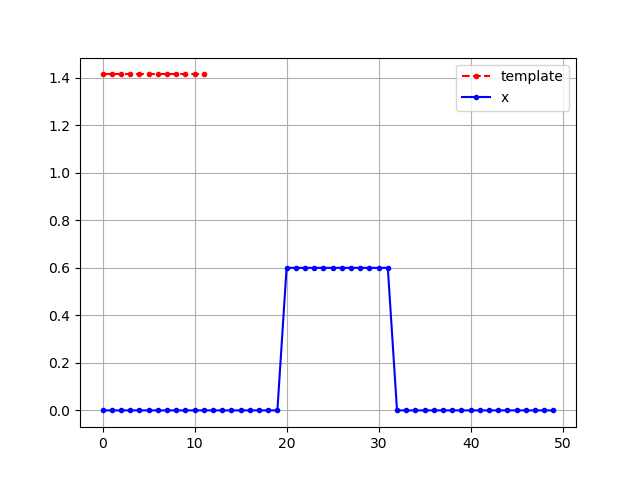

<IPython.core.display.Javascript object>


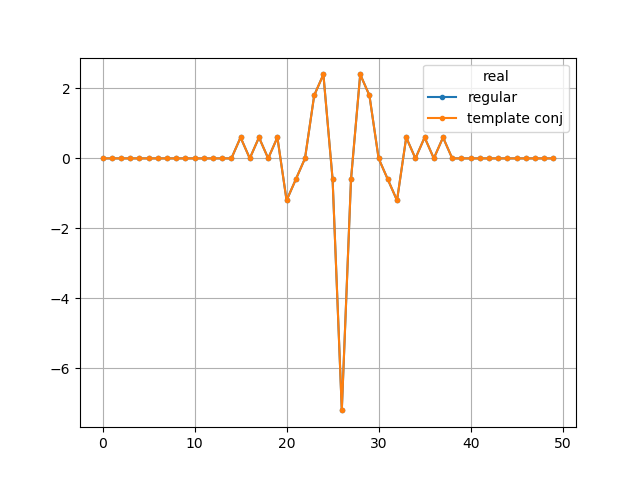

<IPython.core.display.Javascript object>


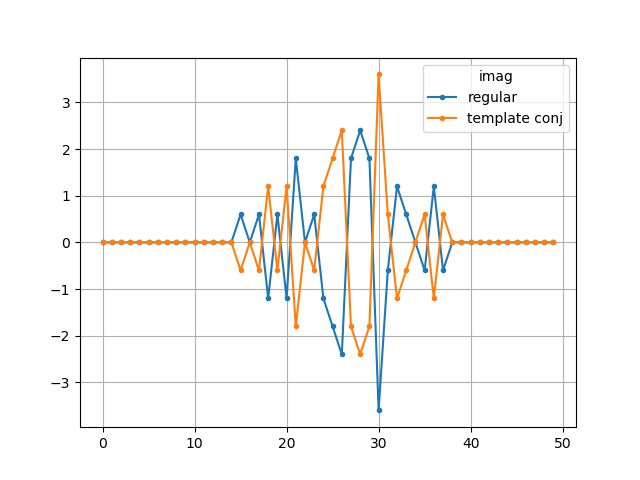

In [51]:
# test matched filter
template = np.array([1+1j, 1-1j, 1-1j, -1-1j, -1+1j, -1+1j, 1-1j, 1+1j, -1-1j, -1+1j, 1-1j, -1+1j])
print("template size:", template.size)

def matchedFilter(data, template, mode='full'):
    m = np.flipud(np.conj(template))
    # m = np.flipud(template)
    return np.convolve(data, m, mode=mode)
    

x = np.zeros(50)
x[20:20+template.size] = -0.6*template

plt.figure()
plt.plot(np.abs(template), 'r.--', label="template")
plt.plot(np.abs(x), 'b.-', label="x")
plt.legend()
plt.grid()

xFilt = matchedFilter(x, template, 'same')
xFiltConj = matchedFilter(x, np.conj(template), 'same')

plt.figure()
# plt.plot(np.real(xFilt), 'b.-', label="real")
# plt.plot(np.imag(xFilt), 'r.-', label="imag")
plt.plot(np.real(xFilt), 'C0.-', label="regular")
plt.plot(np.real(xFiltConj), 'C1.-', label="template conj")
plt.legend(title="real")
plt.grid()

plt.figure()
plt.plot(np.imag(xFilt), 'C0.-', label="regular")
plt.plot(np.imag(xFiltConj), 'C1.-', label="template conj")
plt.legend(title="imag")
plt.grid()

plt.show()

<IPython.core.display.Javascript object>


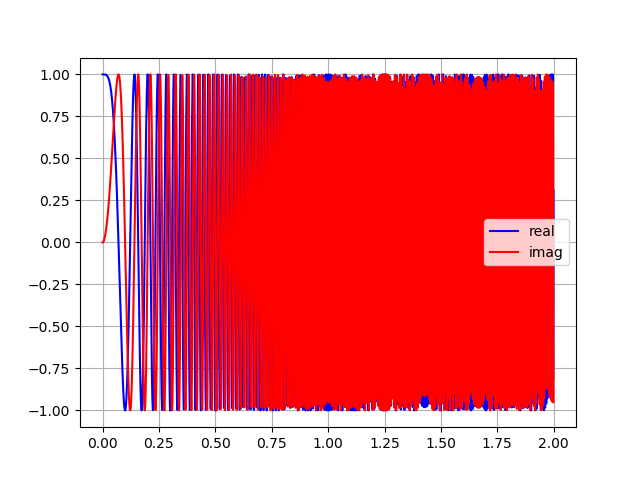

In [64]:
# template of a linear chirp
# Ts: sampling time
# fc: center frequency of chirp
# bw: bandwidth of chirp
# TChirp: chirp length
# f0: center frequency of data (i.e. frequency of 0th bucket of resulting FFT)
def chirpTemplate(Ts, fc, bw, TChirp, f0=0.0, direction='up'):
    t = np.arange(0, TChirp, Ts)
    if direction == 'up':
        fStart = fc - bw/2
        fEnd = fc + bw/2
    elif direction == 'down':
        fStart = fc + bw/2
        fEnd = fc - bw/2
    chirp = mtools.IQChirp(t, fStart, TChirp, fEnd)
    return t, chirp

fs = 1e3
Ts = 1/fs
fc = 100.0
bw = 200.0
TChirp = 2
f0 = 0.0  # frequency offset

t, x = chirpTemplate(Ts, fc, bw, TChirp, f0)

plt.figure()
plt.plot(t, x.real, 'b-', label="real")
plt.plot(t, x.imag, 'r-', label="imag")
plt.grid()
plt.legend()

plt.show()

In [62]:
# return the output of a data series match filtered with a template chirp
# NOTE: this should be a convenience function rather than a full library function.
# We will most likely 
def chirpMatchedFilter(data, Ts, fcData, fcSignal, bwChirp, TChirp, direction='up'):
    # generate a template chirp with the sampling rate of the extracted signal
    _, chirpTemp = mtools.chirpTemplate(Ts, fc, bwChirp, TChirp, f0, direction)
    result = mtools.matchedFilter(data, chirpTemp, 'same')
    return result, f0, TsBB

chirp time for SF9: 0.004096
size of extracted signal:  250002
frequency of 0th FFT bucket/baseband:  904937500.0
sampling time at baseband:  3.999968000255998e-06
freq offset of chirp in baseband:  62500.0
fStart: 125000.0  fEnd: 0.0
size of chirp template:  1025


<IPython.core.display.Javascript object>


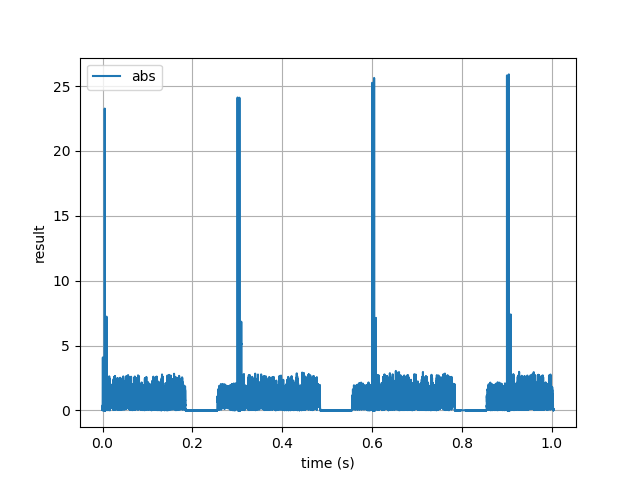

<IPython.core.display.Javascript object>


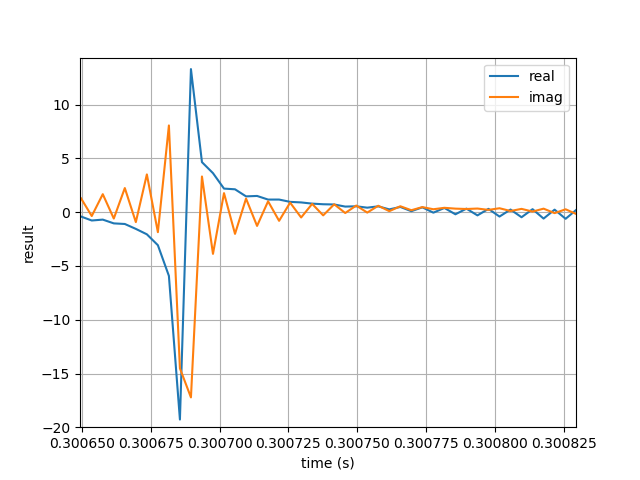

<IPython.core.display.Javascript object>


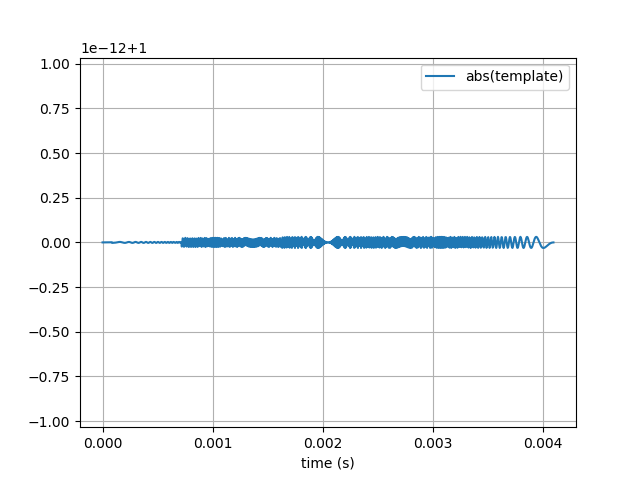

<IPython.core.display.Javascript object>


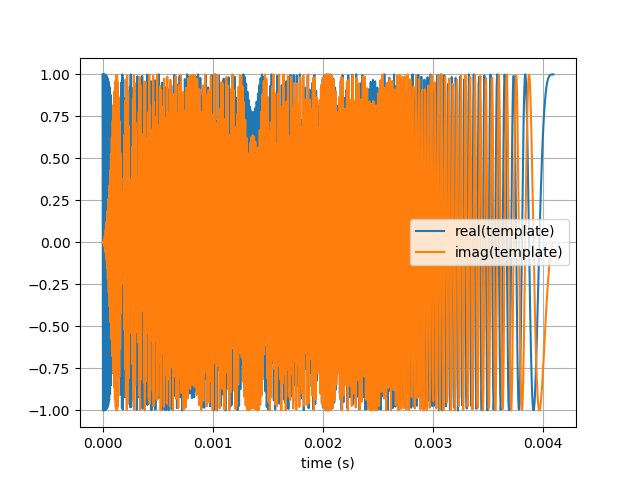

In [19]:
# complete example

# load data and fill out all collection parameters
data = mtools.load_IQBinary_float32("../data/test_outside_Feb27/pre_check.dat")
fs = 1.0e6  # sampling frequency of reception
fcRX = 904.75e6  # center frequency of RX mixer
fcTX = 905.0e6  # center frequency of TX
bwChirp = 125.0e3
sf = 9

def loraSymboltime(bw, sf):
    return (2**sf)/bw

Ts = 1/fs
TChirp = loraSymboltime(bwChirp, sf)
print("chirp time for SF{:d}: {}".format(sf, TChirp))

# step 1: extract signals only in the relevant frequency bands
# adjust this so that we're only looking at signals in the relevant bandwidth
# NOTE: wider bandwidth means more noise but the signal is left intact

dataBB, fcBB, TsBB = mtools.basebandShift(data, Ts, bwSignal=bwChirp,
                    fcSignal=fcTX, fcData=fcRX, signalType='ds')
print("size of extracted signal: ", dataBB.size)
print("frequency of 0th FFT bucket/baseband: ", fcBB)
print("sampling time at baseband: ", TsBB)

# generate template
fcBBChirp = fcTX - fcBB
print("freq offset of chirp in baseband: ", fcBBChirp)
template = mtools.chirpTemplate(Ts=TsBB, fc=fcBBChirp, bw=bwChirp, TChirp=TChirp, direction='down')
print("size of chirp template: ", template.size)

result = mtools.matchedFilter(dataBB, template)
tBB = np.arange(result.size)*TsBB  # times at which result was computed

plt.figure()
plt.plot(tBB, np.abs(result), 'C0-', label="abs")
plt.xlabel("time (s)")
plt.ylabel("result")
plt.legend()
plt.grid()


plt.figure()
plt.plot(tBB, result.real, 'C0-', label="real")
plt.plot(tBB, result.imag, 'C1-', label="imag")
plt.xlabel("time (s)")
plt.ylabel("result")
plt.legend()
plt.grid()

# show the template we're using
tTemp = np.arange(template.size)*TsBB
plt.figure()
plt.plot(tTemp, np.abs(template), 'C0-', label="abs(template)")
plt.xlabel("time (s)")
plt.legend()
plt.grid()

plt.figure()
plt.plot(tTemp, template.real, 'C0-', label="real(template)")
plt.plot(tTemp, template.imag, 'C1-', label="imag(template)")
plt.xlabel("time (s)")
plt.legend()
plt.grid()

plt.show()